In [3]:
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import linalg
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
import pandas as pd

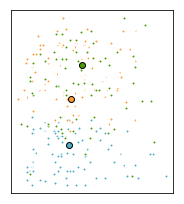

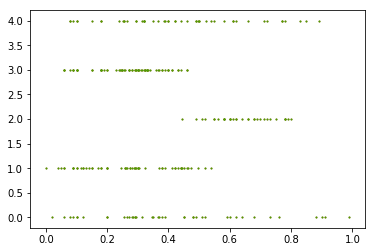

In [9]:
colors = ['navy', 'turquoise', 'darkorange']

def ellipse(GMM, axis) :
    for n, color in enumerate(colors):
        if GMM.covariance_type == 'full':
            covariances = GMM.covariances_[n][:2, :2]
        elif GMM.covariance_type == 'tied':
            covariances = GMM.covariances_[:2, :2]
        elif GMM.covariance_type == 'diag':
            covariances = np.diag(GMM.covariances_[n][:2])
        elif GMM.covariance_type == 'spherical':
            covariances = np.eye(GMM.means_.shape[1]) * GMM.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(GMM.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(axis.bbox)
        ell.set_alpha(0.5)
        axis.add_artist(ell)

X = pd.read_csv('datauser.csv', sep=',',header=0)
kmean = KMeans(n_clusters = 3)
kmean.fit(X)

GMM = GaussianMixture(n_components = 5, covariance_type = 'full',
                      init_params = 'kmeans')
GMM.fit(X)
plot = plt.figure(figsize = (8,3))
plot.subplots_adjust(left = 0.02, right = 0.98, bottom = 0.05, top = 0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

cluster_centers = np.sort(kmean.cluster_centers_, axis=0)
labels = pairwise_distances_argmin(X, cluster_centers)
X = X.values
axis = plot.add_subplot(1, 3, 1)
for k, col in zip(range(3), colors):
    my_members = labels == k
    c_center = cluster_centers[k]
    axis.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    axis.plot(c_center[0], c_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
axis.set_xticks(())
axis.set_yticks(())
plt.show()
for n, color in enumerate(colors):
    plt.scatter(X[:, 0], GMM.predict(X), s=0.8, color=color,
                label=labels)
plt.show()